In [433]:
from sklearn.cluster import KMeans
import os
import pandas
from sklearn import metrics
from sklearn.model_selection import train_test_split
from matplotlib import pyplot
import numpy

In [434]:
path = os.path.dirname(os.path.dirname(os.path.abspath(__name__)))
data_path = os.path.join(path, 'data')

def explorer(name):
    name = name + '.csv'
    path = os.path.join(data_path, name)
    return path if os.path.exists(path) else None

In [444]:
data = pandas.read_csv(explorer('combined'))
columns = ['height', 'weight', 'spike', 'block', 'position_number']
players = pandas.DataFrame(data=data, columns=columns)

In [457]:
def center_height(height):
    mean = players['height'].mean()
    stdeviation = df['height'].std()
    return ((height - mean) / stdeviation) ** 2

players['centered_height'] = players['height'].apply(center_height)
players.head()

,height,weight,spike,block,position_number,centered_height
0,173,69,268,260,3,0.901035
1,180,70,285,275,3,0.008438
2,182,69,283,273,3,0.023440
3,184,74,294,282,2,0.158455
4,181,60,290,272,2,0.000938


In [458]:
# centered_heights = pyplot.hist(df['centered_height'], color='blue')
# non_centered_heights = pyplot.hist(df['height'], color='red')
# pyplot.xlabel('Heigt (cm)')
# pyplot.ylabel('Count')
# pyplot.grid(axis='y')
# pyplot.plot()
# pyplot.show()

In [459]:
# def check_height(height):
#     if height < 170 or height > 180:
#         return 1
#     else:
#         return 0
# players['checked_height'] = players['height'].apply(check_height)
# players.head()

In [460]:
X = players[['height', 'position_number']]
y = players['weight']

In [461]:
players.groupby(['position_number'])['height'].count()


position_number
1     66
2    133
3    105
4     55
6     45
Name: height, dtype: int64

In [462]:
model = KMeans(n_clusters=2)
model.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [463]:
observation = [[199, 56]]
prediction = model.predict(observation)
print('The predicted weight for Julia would be %s' % prediction[0])

The predicted weight for Julia would be 1


In [360]:
predictions = model.predict(X)
predictions[:20]

array([1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0])

In [362]:
# metrics.r2_score(X, predictions)

In [363]:
model.score(X)

-7311.204271238557

Text(0, 0.5, 'Height (cm)')

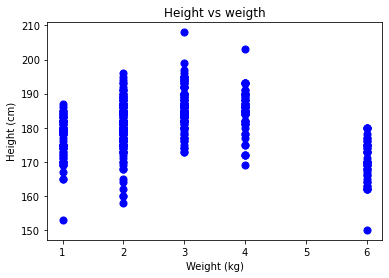

In [468]:
pyplot.subplot(1, 1, 1)
pyplot.scatter(x=players['position_number'], y=players['height'], c='blue', s=50)

pyplot.title('Height vs weigth')
pyplot.xlabel('Weight (kg)')
pyplot.ylabel('Height (cm)')

# pyplot.subplot(1, 2, 2)
# pyplot.scatter(x=players['spike'], y=players['height'], c='grey', s=50)

# pyplot.title('Height vs spike')
# pyplot.xlabel('Spike (cm)')
# pyplot.ylabel('Height (cm)')
